<h1 style="color: #FF8C00;">00 |</h1>

In [4]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from xgboost import XGBRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 


<h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [6]:
data = pd.read_csv("king_ country_ houses_aa.csv")

In [7]:
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [8]:
open_data(data)

Data shape is (21613, 21).

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Data row sample and full columns:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1091,7202330370,20150210T000000,448000.0,3,2.25,1530,3056,2.0,0,0,...,7,1530,0,2003,0,98053,47.6817,-122.035,1560,3064
4580,6398000011,20140602T000000,789000.0,3,3.00,3740,39640,2.0,0,2,...,10,3740,0,1991,0,98070,47.4036,-122.462,2930,26136
15467,1929300305,20140623T000000,1220000.0,4,3.75,3520,3944,1.5,0,0,...,8,2200,1320,1913,0,98109,47.6424,-122.348,2310,4725
5442,8163000020,20150126T000000,805000.0,5,3.00,2240,18265,2.0,0,0,...,8,2240,0,1963,0,98027,47.5171,-122.029,1990,18265
5832,5702500050,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [9]:
snake_columns(data)

In [10]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [11]:
df = data.copy()

In [12]:
df.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

<h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

In [14]:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
id,0,0
date,0,0
price,0,0
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0


In [15]:
top_20_bedrooms = df.sort_values(by='bedrooms', ascending=False).head(5)
top_20_bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [16]:
# droped
df.drop(columns=['id'], inplace=True)
df.drop(columns=['date'], inplace=True)
df = df.drop(index=15870)

In [17]:
# new column 'house_age' combining 'yr_renovated' and 'yr_built'
df['house_age'] = df['yr_renovated'].where(df['yr_renovated'] != 0, df['yr_built'])

# drop 'yr_renovated' and 'yr_built'
df.drop(columns=['yr_renovated', 'yr_built'], inplace=True)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,1987


In [19]:
df[(df['bathrooms'] == 0) & (df['bedrooms'] == 0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
875,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,98102,47.6362,-122.322,2360,4000,1990
3119,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,98133,47.7145,-122.356,1470,1399,2006
6994,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,98053,47.6642,-122.069,4740,35061,1990
9773,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,98031,47.4095,-122.168,2520,8050,1990
9854,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,98065,47.5265,-121.828,1060,7200,1996
14423,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,98001,47.2781,-122.250,1380,9600,1913
19452,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,98024,47.5308,-121.888,1620,22850,1963


In [20]:
# drop rows with 'bedrooms' and 'bathrooms' are 0
df = df[~((df['bedrooms'] == 0) & (df['bathrooms'] == 0))]

<h1 style="color: #FF8C00;">03 | EDA </h1>

In [22]:
df.nunique().sort_values(ascending=False)

sqft_lot         9780
sqft_lot15       8687
lat              5033
price            4025
sqft_living      1035
sqft_above        943
sqft_living15     777
long              752
sqft_basement     306
house_age         116
zipcode            70
bathrooms          30
bedrooms           12
grade              11
floors              6
condition           5
view                5
waterfront          2
dtype: int64

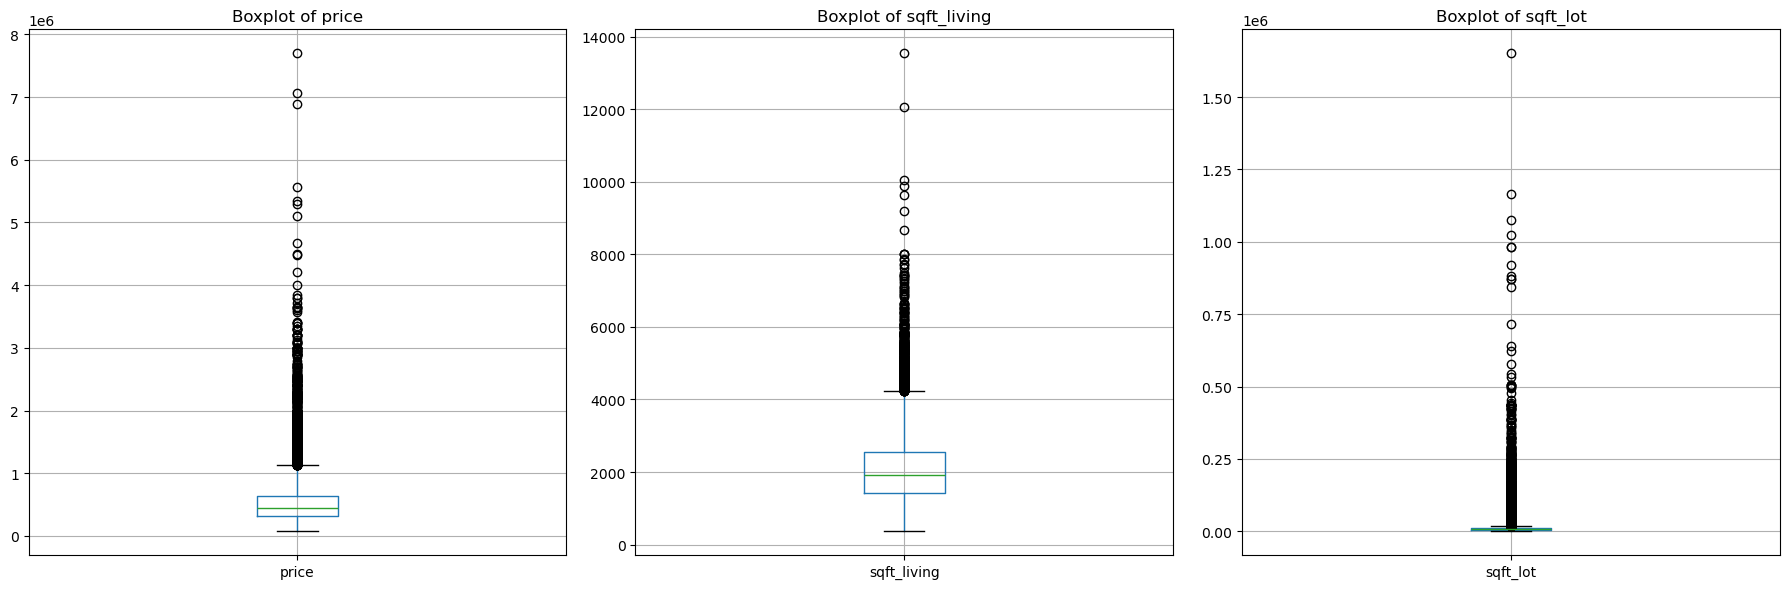

In [23]:
numeric_cols = ['price', 'sqft_living', 'sqft_lot']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed

for i, col in enumerate(numeric_cols):
    df.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [24]:
# interquartile Range (IQR) for 'price', 'sqft_living' and 'sqft_lot'
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# rows outside these bounds (outliers)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

price: Lower Bound = -162500.0, Upper Bound = 1129500.0
sqft_living: Lower Bound = -145.75, Upper Bound = 3976.25
sqft_lot: Lower Bound = -2800.0, Upper Bound = 18000.0


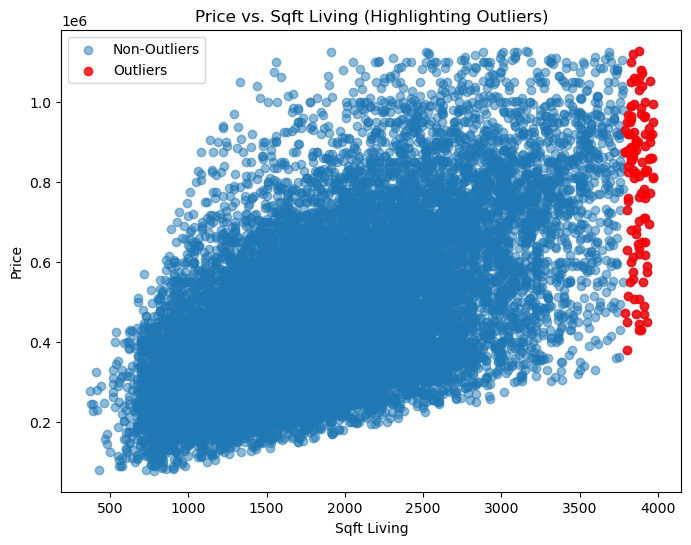

In [25]:
# IQR for sqft_living and sqft_lot
Q1_sqft_living = df['sqft_living'].quantile(0.25)
Q3_sqft_living = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living
lower_bound_sqft_living = Q1_sqft_living - 1.5 * IQR_sqft_living
upper_bound_sqft_living = Q3_sqft_living + 1.5 * IQR_sqft_living

Q1_sqft_lot = df['sqft_lot'].quantile(0.25)
Q3_sqft_lot = df['sqft_lot'].quantile(0.75)
IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot
lower_bound_sqft_lot = Q1_sqft_lot - 1.5 * IQR_sqft_lot
upper_bound_sqft_lot = Q3_sqft_lot + 1.5 * IQR_sqft_lot

# outliers
sqft_living_outliers = df[(df['sqft_living'] < lower_bound_sqft_living) | (df['sqft_living'] > upper_bound_sqft_living)]
sqft_lot_outliers = df[(df['sqft_lot'] < lower_bound_sqft_lot) | (df['sqft_lot'] > upper_bound_sqft_lot)]

plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, label='Non-Outliers')
plt.scatter(sqft_living_outliers['sqft_living'], sqft_living_outliers['price'], color='red', alpha=0.8, label='Outliers')
plt.title('Price vs. Sqft Living (Highlighting Outliers)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

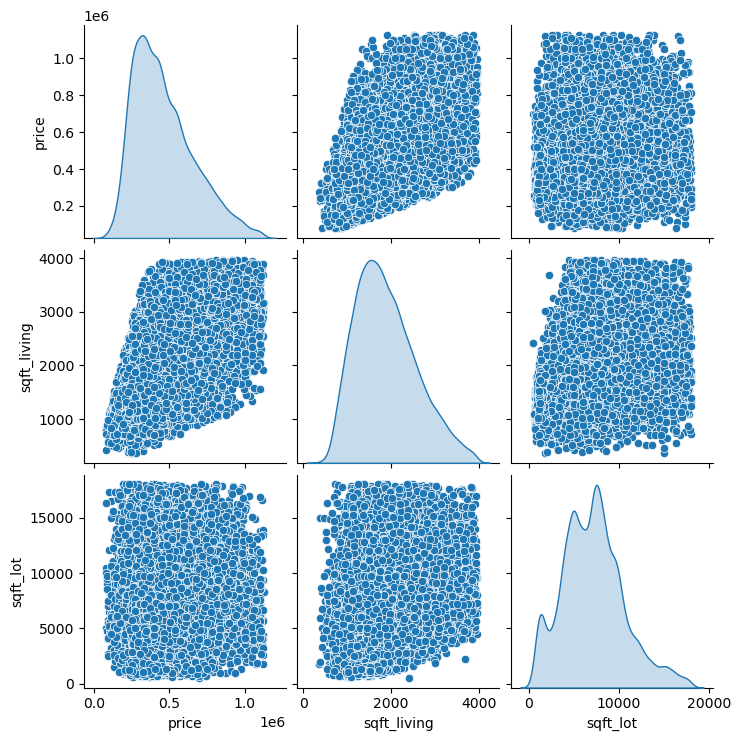

In [26]:
import seaborn as sns

subset = df[['price', 'sqft_living', 'sqft_lot']]

sns.pairplot(subset, diag_kind='kde')
plt.show()

**Notes**

    1.	Diagonal Plots: Distributions
    	•	These diagonal plots show the distributions of each variable:
    	•	price: Right-skewed, meaning most houses are low to moderately priced, but some luxury properties drive the tail to the right.
    	•	sqft_living: Right-skewed, with most houses having moderate square footage, but some very large houses contribute to the tail.
    	•	sqft_lot: Also right-skewed, with smaller lot sizes being more common than large ones.
	2.	Scatter Plots
    	•	price vs. sqft_living:
    	•	positive correlation: as sqft_living increases, price tends to increase.
    	•	This is a stronger relationship compared to sqft_lot.
    	•	price vs. sqft_lot:
    	•	A weaker correlation: Lot size does not influence price as strongly as sqft_living.
    	•	sqft_living vs. sqft_lot:
    	•	No linear relationship: Large lots do not necessarily mean larger living spaces.

**Conclusion**

    1.	sqft_living has a stronger relationship with price compared to sqft_lot.
	2.	Both price and sqft_living are right-skewed distributions, suggesting that luxury homes (outliers) drive the upper ends of these variables.
	3.	The scatter plots show that sqft_lot contributes less to predicting price, while sqft_living is more predictive.

In [28]:
# IQR upper bounds for price and sqft_living
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_sqft_living = df['sqft_living'].quantile(0.25)
Q3_sqft_living = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living
upper_bound_sqft_living = Q3_sqft_living + 1.5 * IQR_sqft_living

# extreme values for price and sqft_living
extreme_values = df[(df['price'] > upper_bound_price) | (df['sqft_living'] > upper_bound_sqft_living)]

# show extreme values
print(extreme_values[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']].head())

         price  sqft_living  sqft_lot  bedrooms  bathrooms
91   1099880.0         3520      6353         5       2.75
103  1088000.0         2920      8113         3       2.50
218  1072000.0         3900     14864         2       2.25
394  1118000.0         3840     16619         4       2.50
432  1000000.0         2610      3277         4       2.50


In [29]:
# basic statistics of extreme properties
extreme_summary = extreme_values.describe()
print(extreme_summary)

# unique zip codes for extreme properties
print("Unique zipcodes for extreme properties:")
print(extreme_values['zipcode'].value_counts())

              price    bedrooms   bathrooms  sqft_living      sqft_lot  \
count  3.670000e+02  367.000000  367.000000   367.000000    367.000000   
mean   9.737763e+05    3.980926    2.859673  3145.934605   8146.280654   
std    1.559200e+05    0.909673    0.708840   671.587664   3647.311198   
min    3.800000e+05    2.000000    1.000000  1330.000000   1767.000000   
25%    9.775000e+05    3.000000    2.500000  2635.000000   5109.500000   
50%    1.015000e+06    4.000000    2.750000  3200.000000   7680.000000   
75%    1.070000e+06    4.000000    3.500000  3820.000000  10748.000000   
max    1.127000e+06    9.000000    4.500000  3970.000000  17745.000000   

           floors  waterfront        view   condition       grade  \
count  367.000000  367.000000  367.000000  367.000000  367.000000   
mean     1.791553    0.008174    0.738420    3.525886    8.899183   
std      0.472766    0.090165    1.235725    0.745669    0.965625   
min      1.000000    0.000000    0.000000    3.000000    

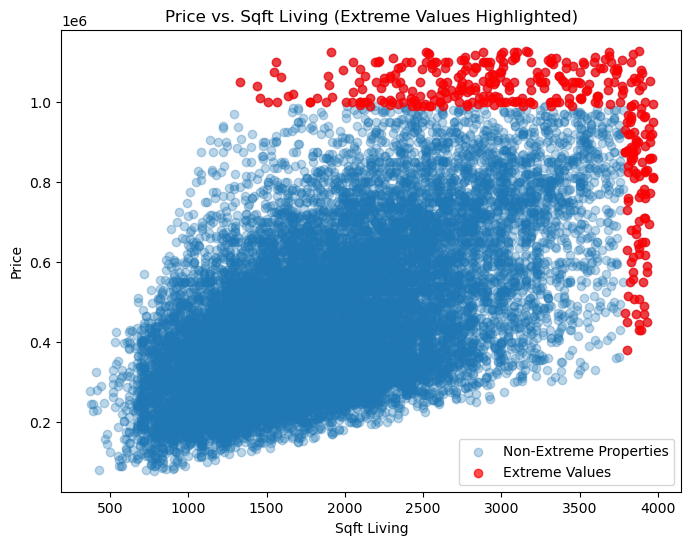

In [30]:
# scatter plot to visualize extreme values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3, label='Non-Extreme Properties')
plt.scatter(extreme_values['sqft_living'], extreme_values['price'], color='red', alpha=0.7, label='Extreme Values')
plt.title('Price vs. Sqft Living (Extreme Values Highlighted)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
import folium
import pandas as pd

# filter extreme properties
extreme_df = df[(df['price'] > df['price'].quantile(0.75) + 1.5 * (df['price'].quantile(0.75) - df['price'].quantile(0.25)))]

# group by zipcode and get the mean latitude, longitude, and count
extreme_zipcode = extreme_df.groupby('zipcode').agg({
    'lat': 'mean',
    'long': 'mean',
    'price': 'count'
}).rename(columns={'price': 'count'}).reset_index()

# initialize a Folium map centered around King County
m = folium.Map(location=[47.5, -122.2], zoom_start=10)

# add circle markers for each zipcode
for _, row in extreme_zipcode.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=row['count'] * 0.5,  # scale the radius by the count of extreme properties
        popup=f"Zipcode: {row['zipcode']}, Count: {row['count']}",
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m

In [32]:
# new column 'is_luxury' to label extreme values
df['is_luxury'] = ((df['price'] > upper_bound_price) | (df['sqft_living'] > upper_bound_sqft_living)).astype(int)

print(df[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'is_luxury']].head())

print("Luxury properties count:", df['is_luxury'].sum())

      price  sqft_living  sqft_lot  bedrooms  bathrooms  is_luxury
0  221900.0         1180      5650         3       1.00          0
1  538000.0         2570      7242         3       2.25          0
2  180000.0          770     10000         2       1.00          0
3  604000.0         1960      5000         4       3.00          0
4  510000.0         1680      8080         3       2.00          0
Luxury properties count: 367


In [33]:
# statistics for numeric columns
numeric_summary = df.describe()

# statistics for categorical columns
categorical_columns = ['condition', 'grade', 'zipcode', 'is_luxury']
categorical_summary = df[categorical_columns].describe(include='all')

print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)

Summary Statistics for Numeric Columns:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.802600e+04  18026.000000  18026.000000  18026.000000  18026.000000   
mean   4.633651e+05      3.300178      2.014424   1886.740153   7165.038334   
std    2.013450e+05      0.878618      0.689650    689.596180   3418.184722   
min    7.800000e+04      0.000000      0.500000    370.000000    520.000000   
25%    3.080000e+05      3.000000      1.500000   1360.000000   4800.000000   
50%    4.250000e+05      3.000000      2.000000   1800.000000   7140.000000   
75%    5.804088e+05      4.000000      2.500000   2330.000000   9158.750000   
max    1.127000e+06     11.000000      5.750000   3970.000000  18000.000000   

             floors    waterfront          view     condition         grade  \
count  18026.000000  18026.000000  18026.000000  18026.000000  18026.000000   
mean       1.471818      0.001775      0.150782      3.410241      7.450017   
std        

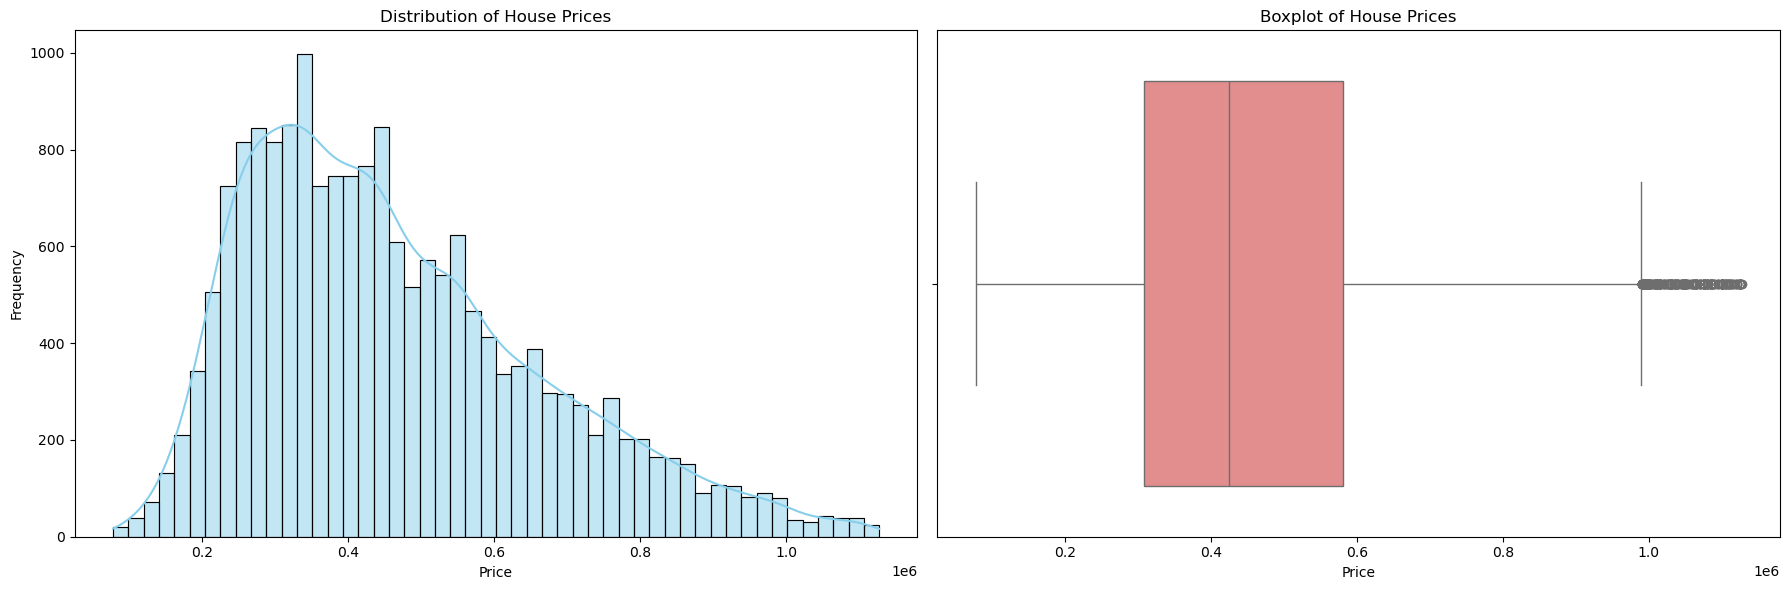

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df['price'], bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of House Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['price'], color='lightcoral', ax=axes[1])
axes[1].set_title('Boxplot of House Prices')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

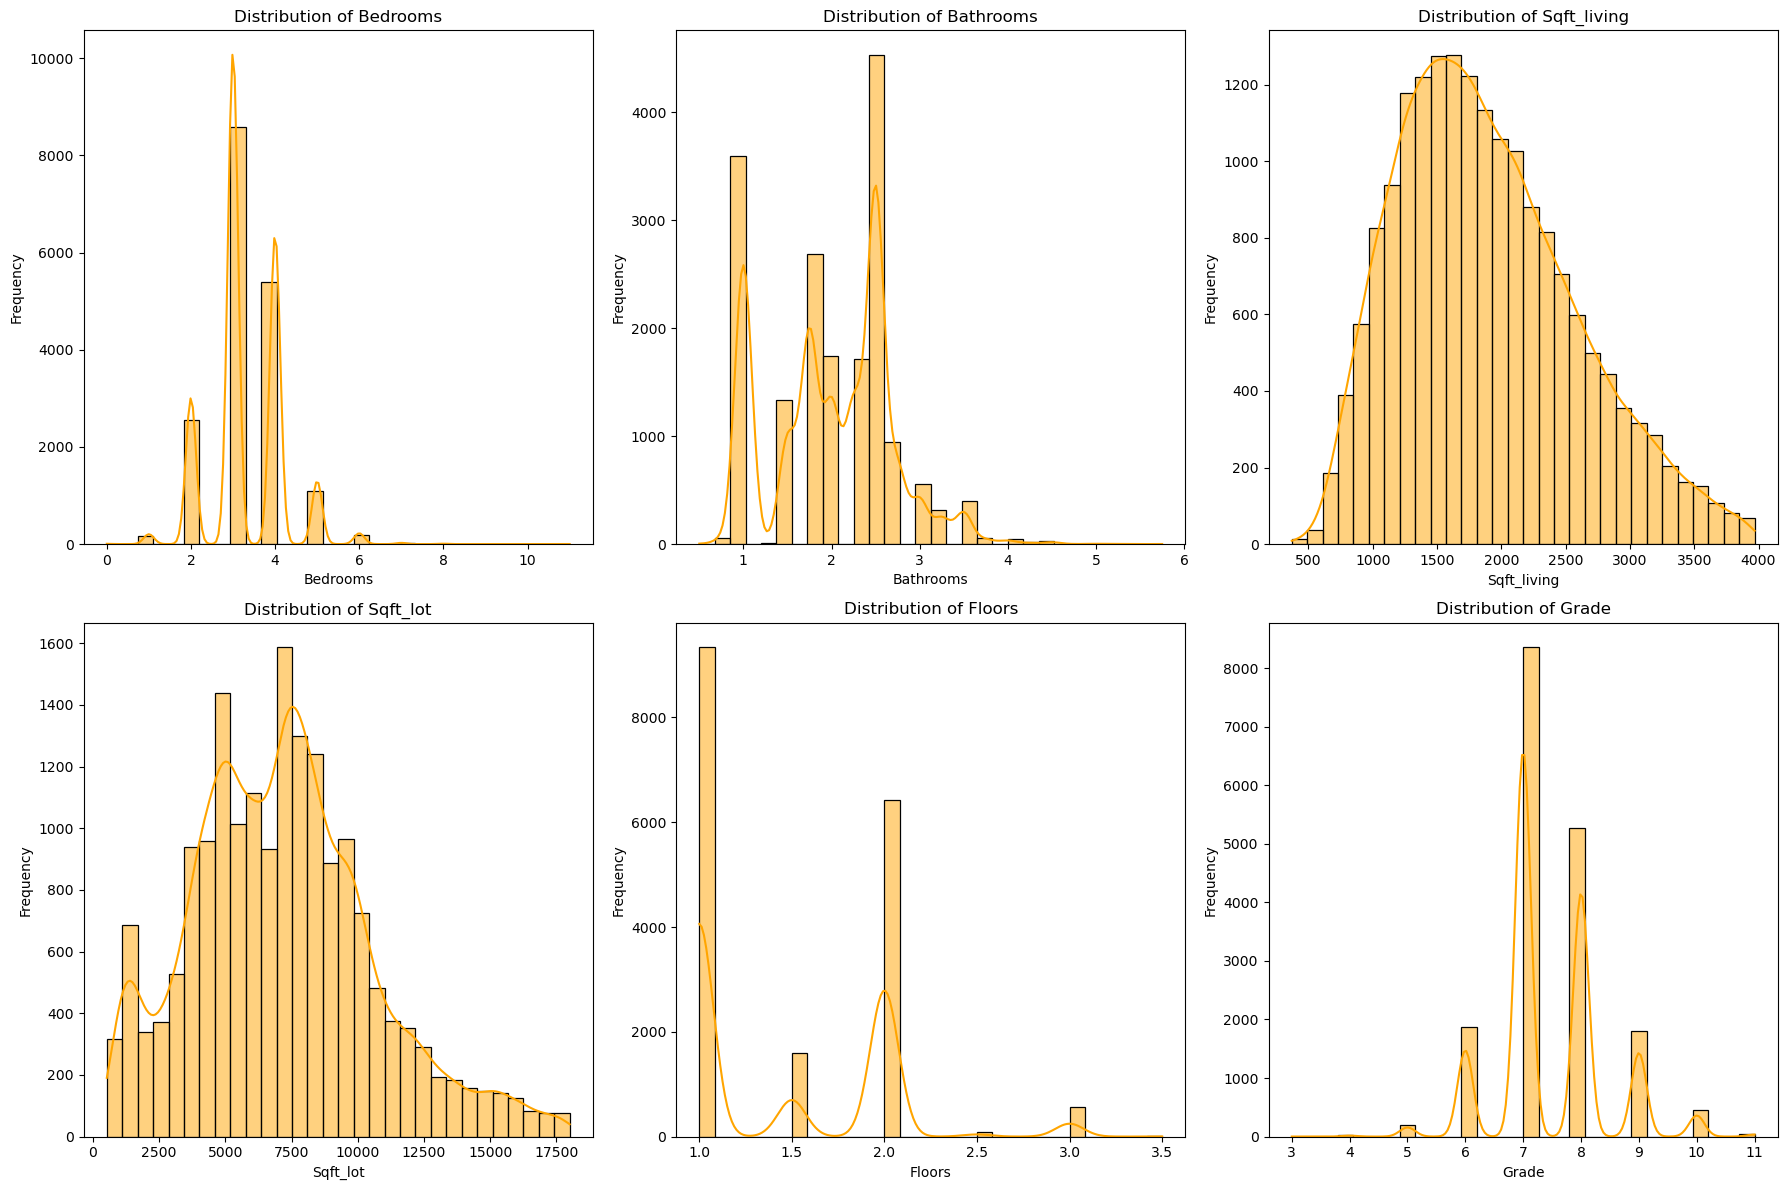

In [35]:
# key variables
key_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed
axes = axes.flatten()

for i, col in enumerate(key_variables):
    sns.histplot(df[col], bins=30, kde=True, color='orange', ax=axes[i])
    axes[i].set_title(f'Distribution of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlations with Price:
 price            1.000000
grade            0.594507
sqft_living      0.584046
sqft_living15    0.518174
sqft_above       0.468909
lat              0.456440
bathrooms        0.411488
is_luxury        0.365461
bedrooms         0.280483
floors           0.253421
view             0.249779
sqft_basement    0.246300
condition        0.058133
house_age        0.052882
waterfront       0.050407
long             0.017865
zipcode          0.010136
sqft_lot        -0.022391
sqft_lot15      -0.037063
Name: price, dtype: float64


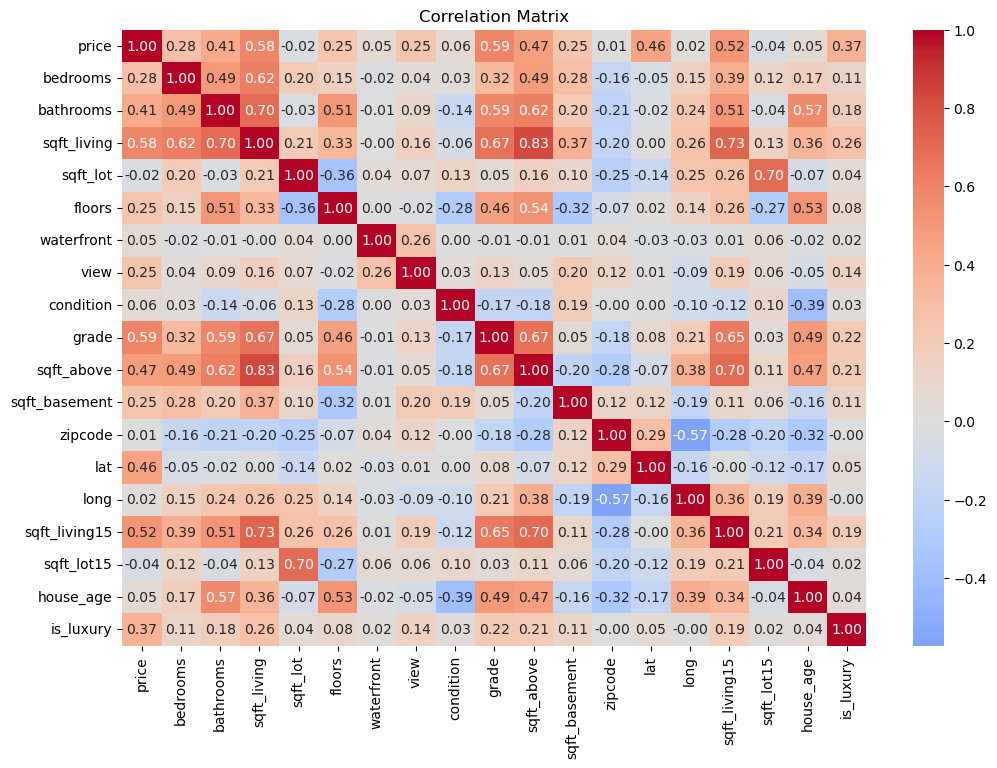

In [36]:
# correlation matrix for numeric columns
correlation_matrix = df.corr()

# correlations of 'price' with other variables
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlations with Price:\n", price_correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

<h2 style="color: #FF6347;">Variance Inflation Factor</h2>

Measures multicollinearity between features in the dataset.

    VIF > 10: Indicates high multicollinearity. You should consider removing one of the correlated features.
    VIF between 5-10: Moderate multicollinearity. Investigate further.
    VIF < 5: No significant multicollinearity.


In [38]:
vif_features = df[['sqft_living', 'sqft_above', 'sqft_living15', 'is_luxury']]

vif_features_with_constant = add_constant(vif_features)

vif = pd.DataFrame()
vif['Feature'] = vif_features_with_constant.columns
vif['VIF'] = [variance_inflation_factor(vif_features_with_constant.values, i) 
              for i in range(vif_features_with_constant.shape[1])]

print(vif)

         Feature        VIF
0          const  12.393037
1    sqft_living   3.858885
2     sqft_above   3.514043
3  sqft_living15   2.282105
4      is_luxury   1.074757


In [39]:
weak_features = ['sqft_lot', 'sqft_lot15', 'condition', 'zipcode']

vif_data = df[weak_features]

vif_data_with_constant = add_constant(vif_data)

vif = pd.DataFrame()
vif['Feature'] = vif_data_with_constant.columns
vif['VIF'] = [variance_inflation_factor(vif_data_with_constant.values, i) 
              for i in range(vif_data_with_constant.shape[1])]

print(vif)

      Feature           VIF
0       const  3.543002e+06
1    sqft_lot  2.013460e+00
2  sqft_lot15  1.945533e+00
3   condition  1.017561e+00
4     zipcode  1.070596e+00


In [40]:
print(df.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
house_age          int64
is_luxury          int64
dtype: object


<h2 style="color: #FF6347;">Dummies</h2>

In [42]:
df_encoded = pd.get_dummies(df, columns=['condition', 'grade'], drop_first=True)

In [43]:
# transforming zipcode into mean of price per zipcode
df['zipcode_encoded'] = df.groupby('zipcode')['price'].transform('mean')

# drop zipcode
df = df.drop(columns=['zipcode'])
print(df[['zipcode_encoded', 'price']].head())

   zipcode_encoded     price
0    304033.629921  221900.0
1    441587.892583  538000.0
2    448071.400000  180000.0
3    527000.476378  604000.0
4    628869.266106  510000.0


In [44]:
# dummy variables for condition (1 to 5)
for i in range(1, 6):
    df[f'condition_{i}'] = (df['condition'] == i).astype(int)

# drop condition
df.drop('condition', axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,sqft_living15,sqft_lot15,house_age,is_luxury,zipcode_encoded,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,...,1340,5650,1955,0,304033.629921,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,...,1690,7639,1991,0,441587.892583,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,...,2720,8062,1933,0,448071.400000,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,...,1360,5000,1965,0,527000.476378,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,...,1800,7503,1987,0,628869.266106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,...,1530,1509,2009,0,568109.464286,0,0,1,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,...,1830,7200,2014,0,337239.283088,0,0,1,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,...,1020,2007,2009,0,507424.037736,0,0,1,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,...,1410,1287,2004,0,564241.695473,0,0,1,0,0


<h1 style="color: #FF8C00;">04 | Data Preprocessing </h1>

In [46]:
X = df.drop(columns=['price'])
y = df['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 18026.
70% for training data: 14420.
30% for test data: 3606.


<h1 style="color: #FF8C00;">05 | Modeling</h1>

<h2 style="color: #FF6347;">XGBoost</h2>

In [50]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}") 
print(f"R² Score: {r2:.4f}")
print("Test data accuracy: ",xgb_model.score(X_test,y_test))
print("Train data accuracy: ", xgb_model.score(X_train, y_train))

Root Mean Squared Error: 65,265.85
Mean Squared Error: 4,259,631,283.08
R² Score: 0.8960
Test data accuracy:  0.8959888969218681
Train data accuracy:  0.9303611815359534


<h2 style="color: #FF6347;"><s>Random Forest</s></h2>

In [52]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)
y_pred_reg = rf_regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))
print("Test data accuracy: ",rf_classifier.score(X_test,y_test))
print("Train data accuracy: ", rf_classifier.score(X_train, y_train))

Accuracy: 0.014697726012201887
MSE: 4686730470.069201
R² Score: 0.8855600464862654
Test data accuracy:  0.014697726012201887
Train data accuracy:  0.9932038834951457


<h2 style="color: #FF6347;"><s>SVM for Regression</s></h2>

In [54]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_reg = svr_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))

MSE: 42353383052.19292
R² Score: -0.03417920415866904


<h2 style="color: #FF6347;"><s>Linear Regression</s></h2>

In [56]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Linear Regression Results:
MSE: 7164714455.43
R² Score: 0.8251


<h2 style="color: #FF6347;"><s>Ridge Regression</s></h2>

In [58]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.4f}")

Ridge Regression Results:
MSE: 7163904878.45
R² Score: 0.8251


<h2 style="color: #FF6347;"><s>Lasso Regression</s></h2>

In [60]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.4f}")

Lasso Regression Results:
MSE: 7164706962.74
R² Score: 0.8251


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+13, tolerance: 5.830e+10
  model = cd_fast.enet_coordinate_descent(


<h1 style="color: #FF8C00;">06 | Improving the Model</h1>

<h2 style="color: #FF6347;">XGBoost</h2>

In [63]:
xgb_model = XGBRegressor(random_state=42, n_estimators=150, learning_rate=0.1)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}") 
print(f"R² Score: {r2:.4f}")
print("Test data accuracy: ",xgb_model.score(X_test,y_test))
print("Train data accuracy: ", xgb_model.score(X_train, y_train))

Root Mean Squared Error: 64,376.10
Mean Squared Error: 4,144,281,639.39
R² Score: 0.8988
Test data accuracy:  0.8988054889888795
Train data accuracy:  0.9407210288917822


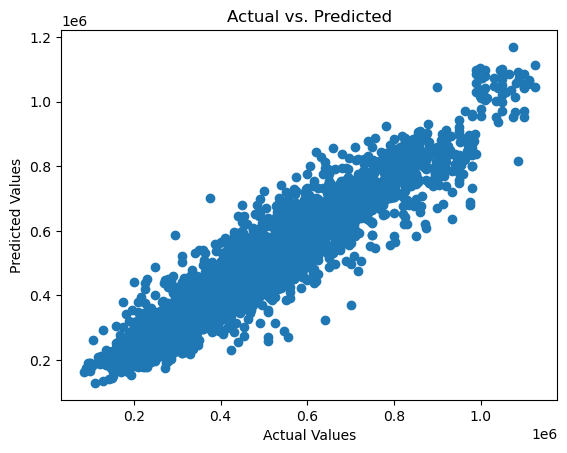

In [64]:
y_pred = xgb_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

<h2 style="color: #FF6347;">Hyperparameter Tuning</h2>

In [66]:
max_depth = range(1, 30)

test = []
train = []

for depth in max_depth:
    xgb_model = XGBRegressor(
        random_state=42,
        n_estimators=300,
        learning_rate=0.1,
        max_depth=depth
    )
    
    xgb_model.fit(X_train, y_train)
    
    train_r2 = xgb_model.score(X_train, y_train)
    test_r2 = xgb_model.score(X_test, y_test)
    
    train.append(train_r2)
    test.append(test_r2)

print("Hyperparameter Tuning Results (max_depth):")
for i, depth in enumerate(max_depth):
    print(f"max_depth: {depth} | Train R²: {train[i]:.4f} | Test R²: {test[i]:.4f}")

Hyperparameter Tuning Results (max_depth):
max_depth: 1 | Train R²: 0.8507 | Test R²: 0.8496
max_depth: 2 | Train R²: 0.8846 | Test R²: 0.8803
max_depth: 3 | Train R²: 0.9048 | Test R²: 0.8929
max_depth: 4 | Train R²: 0.9234 | Test R²: 0.8974
max_depth: 5 | Train R²: 0.9413 | Test R²: 0.9010
max_depth: 6 | Train R²: 0.9583 | Test R²: 0.9004
max_depth: 7 | Train R²: 0.9739 | Test R²: 0.8977
max_depth: 8 | Train R²: 0.9855 | Test R²: 0.8944
max_depth: 9 | Train R²: 0.9915 | Test R²: 0.8927
max_depth: 10 | Train R²: 0.9951 | Test R²: 0.8896
max_depth: 11 | Train R²: 0.9966 | Test R²: 0.8874
max_depth: 12 | Train R²: 0.9971 | Test R²: 0.8840
max_depth: 13 | Train R²: 0.9972 | Test R²: 0.8791
max_depth: 14 | Train R²: 0.9973 | Test R²: 0.8772
max_depth: 15 | Train R²: 0.9973 | Test R²: 0.8756
max_depth: 16 | Train R²: 0.9973 | Test R²: 0.8726
max_depth: 17 | Train R²: 0.9973 | Test R²: 0.8717
max_depth: 18 | Train R²: 0.9973 | Test R²: 0.8697
max_depth: 19 | Train R²: 0.9973 | Test R²: 0.87

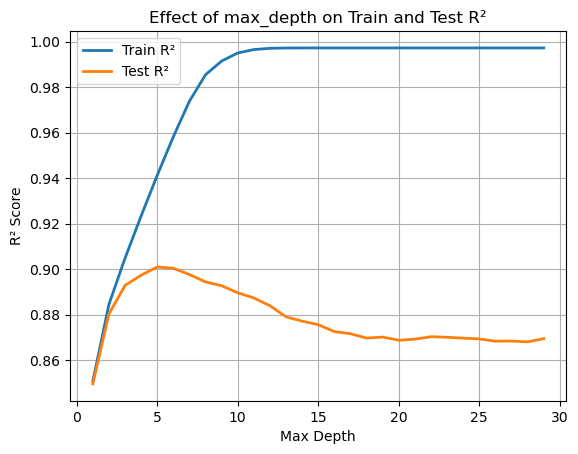

In [67]:
import matplotlib.pyplot as plt

plt.plot(max_depth, train, label='Train R²', linewidth=2)
plt.plot(max_depth, test, label='Test R²', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('Effect of max_depth on Train and Test R²')
plt.legend()
plt.grid()
plt.show()

In [68]:
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=400,          #changed after hyperparameter
    learning_rate=0.1,
    max_depth=5,

)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R² Score: {r2:.4f}")
print("Test data accuracy: ", xgb_model.score(X_test, y_test))
print("Train data accuracy: ", xgb_model.score(X_train, y_train))

Root Mean Squared Error: 63,397.14
Mean Squared Error: 4,019,197,110.80
R² Score: 0.9019
Test data accuracy:  0.9018597861643589
Train data accuracy:  0.9493903651185931


<h2 style="color: #FF6347;">Feature Importances</h2>

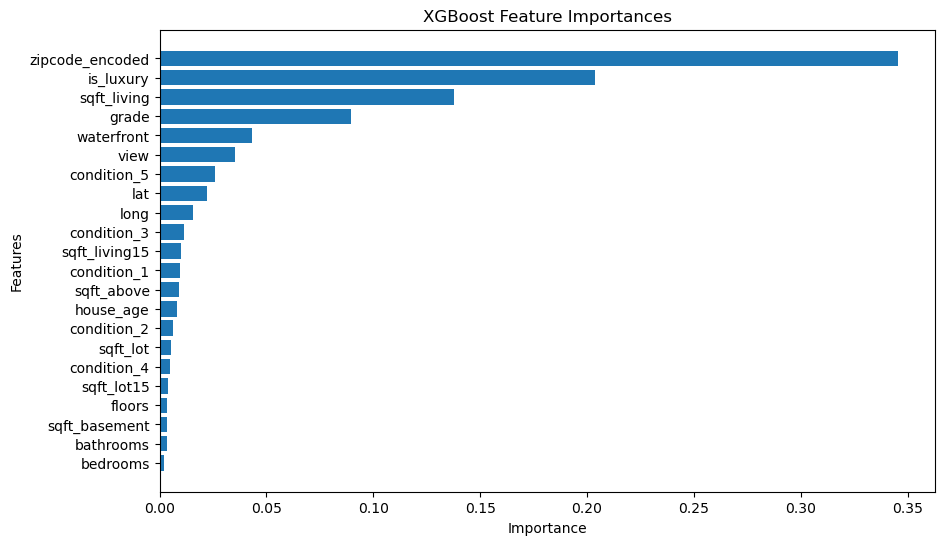

In [70]:
feature_names = X_train.columns[:len(xgb_model.feature_importances_)]
feature_importances = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importances")
plt.gca().invert_yaxis()
plt.show()

<h1 style="color: #FF8C00;">07 | Reporting</h1>

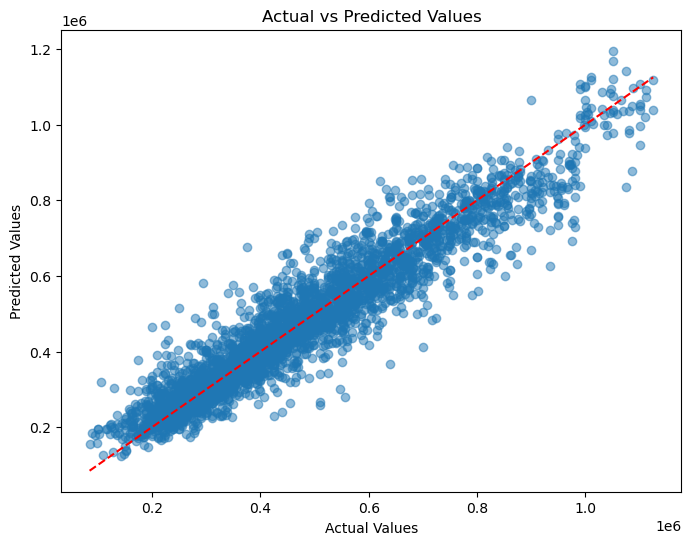

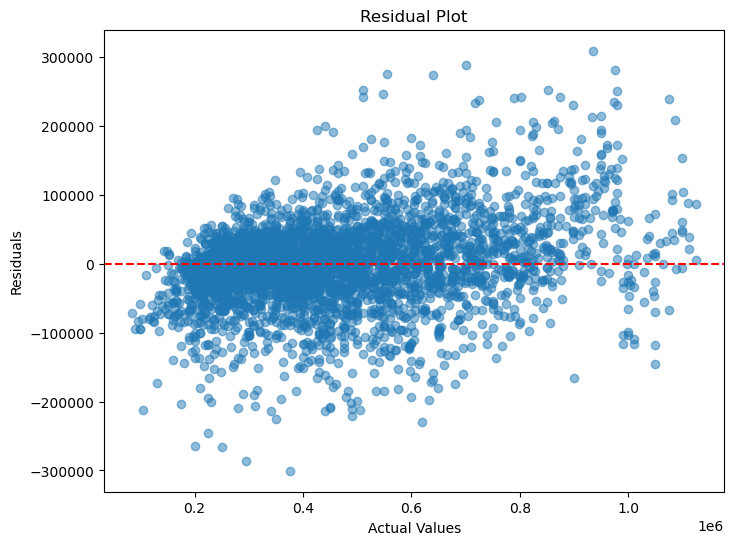

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [73]:
import pickle

with open('xgboost_house_price_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
    
# Load the saved model
# with open('xgboost_house_price_model.pkl', 'rb') as file:
    #loaded_model = pickle.load(file)